In [1]:
# objective: To predict the student's O-level mathematics score, to help the school identify weaker
# students prior to the examination from the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [7]:
# to import dataset
df = pd.read_csv("C:/Users/miche/Desktop/AI_Singapore/Beta test AI Singapore/regression_bonus_practice_data.csv")

In [9]:
# to display variables in the dataset
df.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,NaN,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


In [11]:
# to check datatypes of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15900 non-null  int64  
 1   number_of_siblings  15900 non-null  int64  
 2   direct_admission    15900 non-null  object 
 3   CCA                 12071 non-null  object 
 4   learning_style      15900 non-null  object 
 5   student_id          15900 non-null  object 
 6   gender              15900 non-null  object 
 7   tuition             15900 non-null  object 
 8   final_test          15405 non-null  float64
 9   n_male              15900 non-null  float64
 10  n_female            15900 non-null  float64
 11  age                 15900 non-null  float64
 12  hours_per_week      15900 non-null  float64
 13  attendance_rate     15122 non-null  float64
 14  sleep_time          15900 non-null  object 
 15  wake_time           15900 non-null  object 
 16  mode

In [13]:
# to check for missing values
df.isnull().sum()

index                    0
number_of_siblings       0
direct_admission         0
CCA                   3829
learning_style           0
student_id               0
gender                   0
tuition                  0
final_test             495
n_male                   0
n_female                 0
age                      0
hours_per_week           0
attendance_rate        778
sleep_time               0
wake_time                0
mode_of_transport        0
bag_color                0
dtype: int64

In [15]:
# to check % of missing values by variable
100 * df.isnull().sum()/ len(df)

index                  0.000000
number_of_siblings     0.000000
direct_admission       0.000000
CCA                   24.081761
learning_style         0.000000
student_id             0.000000
gender                 0.000000
tuition                0.000000
final_test             3.113208
n_male                 0.000000
n_female               0.000000
age                    0.000000
hours_per_week         0.000000
attendance_rate        4.893082
sleep_time             0.000000
wake_time              0.000000
mode_of_transport      0.000000
bag_color              0.000000
dtype: float64

In [17]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [19]:
# no duplicated values found
duplicates

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color


In [21]:
# to print descriptive statistics of numeric variables and transpose them
# -5 values are observed in 'age' variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,15900.0,7949.500000,4590.078975,0.0,3974.75,7949.5,11924.25,15899.0
number_of_siblings,15900.0,0.886541,0.751346,0.0,0.00,1.0,1.00,2.0
final_test,15405.0,67.165401,13.977879,32.0,56.00,68.0,78.00,100.0
n_male,15900.0,13.880000,6.552584,0.0,10.00,14.0,18.00,31.0
n_female,15900.0,8.906038,6.663852,0.0,4.00,8.0,13.00,31.0
age,15900.0,15.213459,1.758941,-5.0,15.00,15.0,16.00,16.0
hours_per_week,15900.0,10.312579,4.461861,0.0,7.00,9.0,14.00,20.0
attendance_rate,15122.0,93.270268,7.984230,40.0,92.00,95.0,97.00,100.0


In [23]:
df['age'].describe()

count    15900.000000
mean        15.213459
std          1.758941
min         -5.000000
25%         15.000000
50%         15.000000
75%         16.000000
max         16.000000
Name: age, dtype: float64

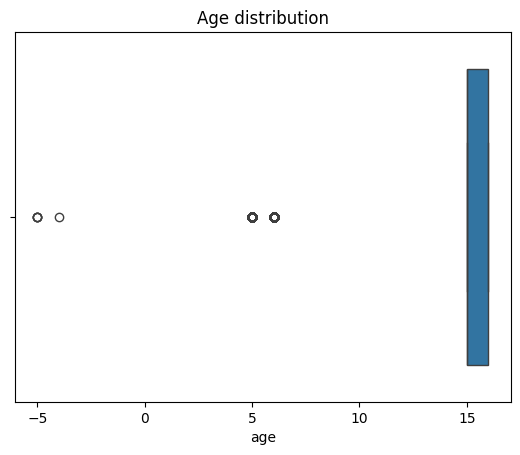

In [25]:
# outlier values are observed in age
sns.boxplot(data=df, x='age')
plt.title('Age distribution')
plt.show()

In [27]:
# to remove outlier values in 'age', from the lower end, 25th quartile
a_Q1_25 = df['age'].quantile(0.25)
a_Q1_25

15.0

In [29]:
a_Q1_75 = df['age'].quantile(0.75)
a_Q1_75

16.0

In [31]:
# Inter Quartile Range
IQR = a_Q1_75 - a_Q1_25
IQR

1.0

In [33]:
# -5, -4, 5 and 6 are outlier values in 'age'
df['age'].value_counts()

age
 15.0    7726
 16.0    7723
 6.0      230
 5.0      216
-5.0        4
-4.0        1
Name: count, dtype: int64

In [35]:
# 'age' lower limit
age_lower_limit = 15 - 1.5 * 1
age_lower_limit

13.5

In [37]:
# to find lower limit outliers
age_lower_array = df[df['age'] > age_lower_limit]

In [39]:
# to remove outlier values in 'age' column
df2 = df[df['age'] > age_lower_limit]
df2.shape

(15449, 18)

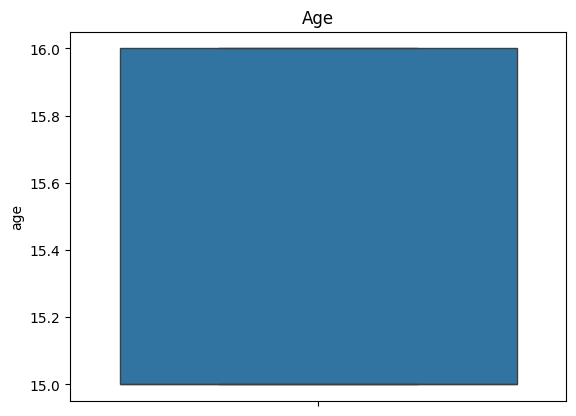

In [41]:
# boxplot to check that outliers have been removed
sns.boxplot(data=df2, y='age')
plt.title('Age')
plt.show()

In [43]:
df2['age'].value_counts()

age
15.0    7726
16.0    7723
Name: count, dtype: int64

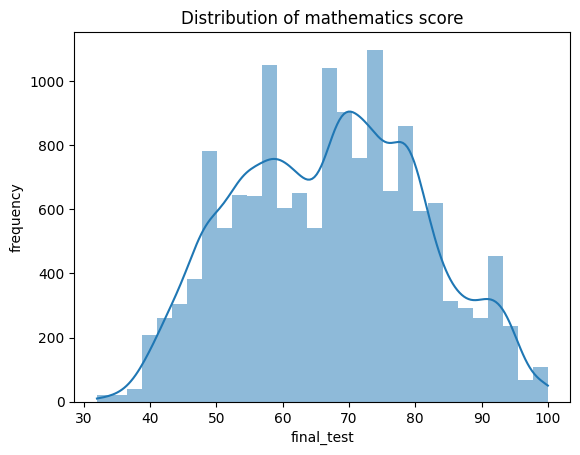

In [45]:
# to plot a histogram of all O level's mathematics score
sns.histplot(data=df2, x='final_test', edgecolor=None, kde=True, bins=30)
plt.title('Distribution of mathematics score')
plt.ylabel('frequency')
plt.show()

In [47]:
# to print categorical variables from dataset
df2.select_dtypes('object')

,direct_admission,CCA,learning_style,student_id,gender,tuition,sleep_time,wake_time,mode_of_transport,bag_color
0,Yes,Sports,Visual,ACN2BE,Female,No,22:00,6:00,private transport,yellow
1,No,Sports,Auditory,FGXIIZ,Female,No,22:30,6:30,private transport,green
2,Yes,NaN,Visual,B9AI9F,Male,No,22:30,6:30,private transport,white
3,No,Clubs,Auditory,FEVM1T,Female,Yes,21:00,5:00,public transport,yellow
4,No,Sports,Auditory,AXZN2E,Male,No,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...
15895,No,Clubs,Visual,XPECN2,Female,No,22:00,6:00,private transport,black
15896,Yes,NaN,Auditory,7AMC7S,Male,Yes,22:30,6:30,private transport,white
15897,Yes,Sports,Auditory,XKZ6VN,Female,Yes,23:00,7:00,walk,red
15898,No,Clubs,Visual,2OU4UQ,Male,Yes,23:00,7:00,walk,yellow


In [49]:
# in the 'CCA' variable, we can see that 'Sports' and 'SPORTS', are labelled as 2 different variables, so is
# 'Clubs' and 'CLUBS'
# 'Arts' and 'ARTS'
df2['CCA'].unique()

array(['Sports', nan, 'Clubs', 'Arts', 'ARTS', 'SPORTS', 'CLUBS', 'NONE'],
      dtype=object)

In [51]:
# to standard categories in 'CCA' variable
df2['CCA'] = df2['CCA'].replace('Sports','SPORTS')
df2['CCA'] = df2['CCA'].replace('Clubs','CLUBS')
df2['CCA'] = df2['CCA'].replace('Arts','ARTS')

C:\Users\miche\AppData\Local\Temp\ipykernel_15388\301445482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CCA'] = df2['CCA'].replace('Sports','SPORTS')
C:\Users\miche\AppData\Local\Temp\ipykernel_15388\301445482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CCA'] = df2['CCA'].replace('Clubs','CLUBS')
C:\Users\miche\AppData\Local\Temp\ipykernel_15388\301445482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [53]:
# to check the change
df2['CCA'].unique()

array(['SPORTS', nan, 'CLUBS', 'ARTS', 'NONE'], dtype=object)

C:\Users\miche\AppData\Local\Temp\ipykernel_15388\2969241403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=df2, x='CCA', palette='Set2')


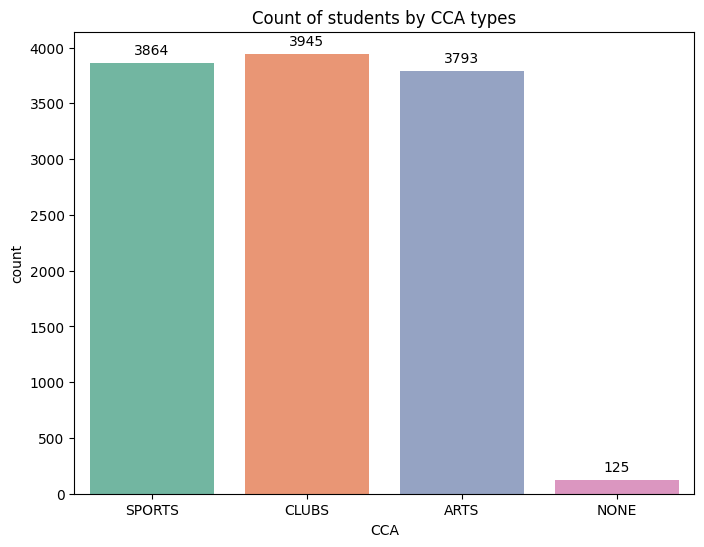

In [55]:
plt.figure(figsize=(8,6), dpi=100)
count_plot = sns.countplot(data=df2, x='CCA', palette='Set2')
plt.title('Count of students by CCA types')

# to Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() /2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0,9),
                        textcoords = 'offset points')

plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_15388\1065565172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='CCA', y='final_test', palette='magma')


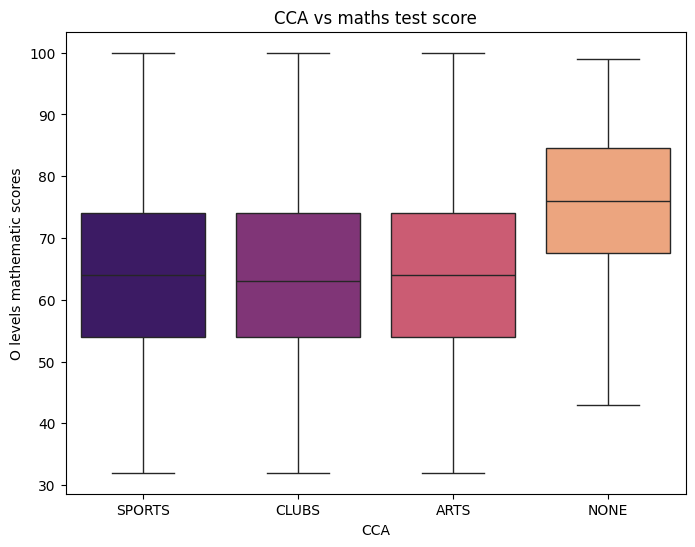

In [57]:
# it is observed that students with no CCA tend to have a higher mathematic test scores
plt.figure(figsize=(8,6), dpi=100)
sns.boxplot(data=df2, x='CCA', y='final_test', palette='magma')
plt.title('CCA vs maths test score')
plt.ylabel('O levels mathematic scores')
plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_15388\2887800567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=df2, x='direct_admission', palette='crest')


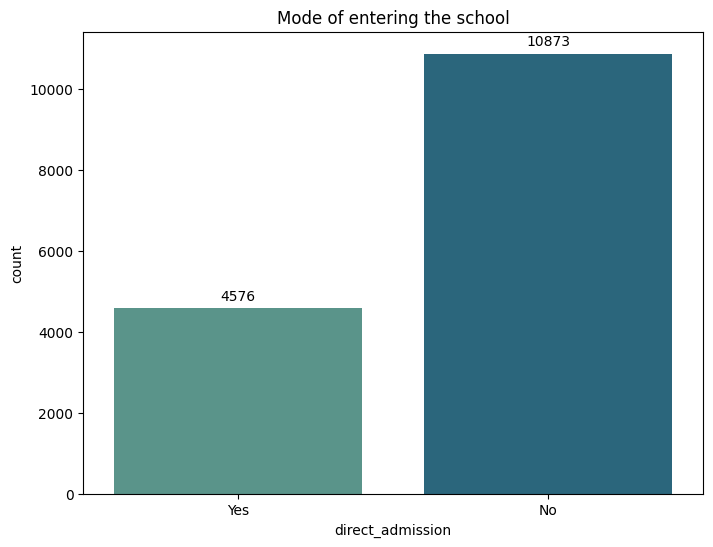

In [59]:
plt.figure(figsize=(8,6), dpi=100)
count_plot = sns.countplot(data=df2, x='direct_admission', palette='crest')
plt.title('Mode of entering the school')

# to Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() /2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0,9),
                        textcoords = 'offset points')

plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_15388\4136704401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=df2, x='learning_style', palette='flare')


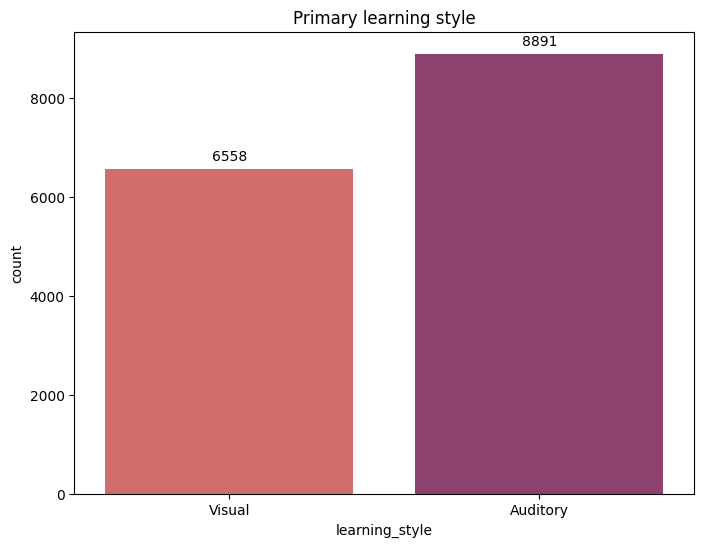

In [61]:
# Majority of student's learning style is Auditory
plt.figure(figsize=(8,6), dpi=100)
count_plot = sns.countplot(data=df2, x='learning_style', palette='flare')
plt.title('Primary learning style')

# to Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() /2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0,9),
                        textcoords = 'offset points')

plt.show()

In [63]:
# there should only be 2 different categories but, there are 4 responses
df2['tuition'].unique()

array(['No', 'Yes', 'Y', 'N'], dtype=object)

In [65]:
# to replace 'Y' to 'Yes', 'N' to 'No'
df2['tuition'] = df2['tuition'].replace('N','No')
df2['tuition'] = df2['tuition'].replace('Y','Yes')

C:\Users\miche\AppData\Local\Temp\ipykernel_15388\2464288008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tuition'] = df2['tuition'].replace('N','No')
C:\Users\miche\AppData\Local\Temp\ipykernel_15388\2464288008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tuition'] = df2['tuition'].replace('Y','Yes')


C:\Users\miche\AppData\Local\Temp\ipykernel_15388\2366234417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=df2, x='tuition', palette='hls')


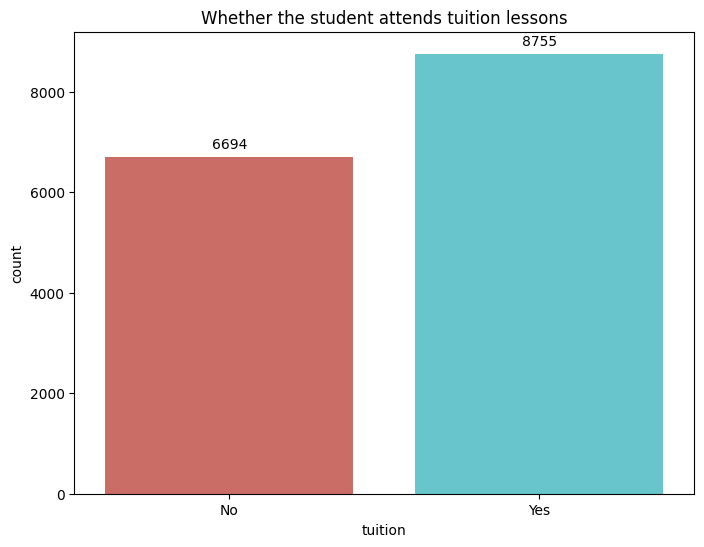

In [67]:
# majority of the students attended tuition classes
plt.figure(figsize=(8,6), dpi=100)
count_plot = sns.countplot(data=df2, x='tuition', palette='hls')
plt.title('Whether the student attends tuition lessons')

# to Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() /2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0,9),
                        textcoords = 'offset points')

plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_15388\1961235400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=df2, x='mode_of_transport', palette='cubehelix')


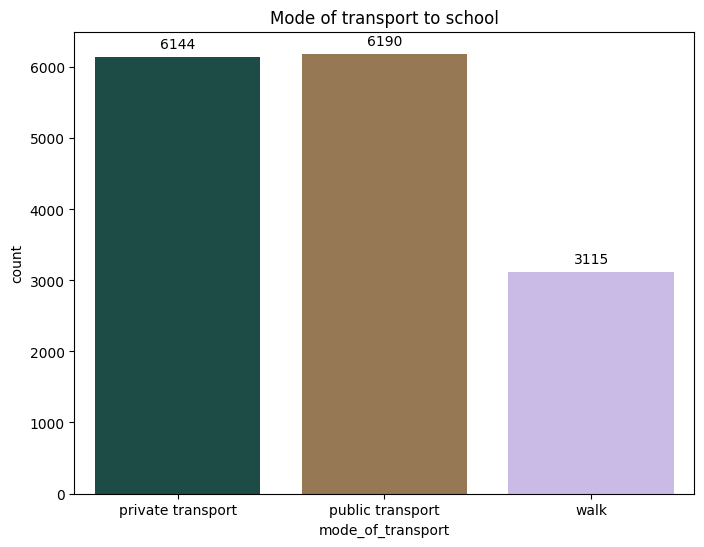

In [69]:
# taking 'public transport' is the most common way students get to school
plt.figure(figsize=(8,6), dpi=100)
count_plot = sns.countplot(data=df2, x='mode_of_transport', palette='cubehelix')
plt.title('Mode of transport to school')

# to Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() /2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0,9),
                        textcoords = 'offset points')

plt.show()

In [71]:
# to print all numeric variables in the dataset
df2.select_dtypes(['int','float'])

,index,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate
0,0,0,69.0,14.0,2.0,16.0,10.0,91.0
1,1,2,47.0,4.0,19.0,16.0,7.0,94.0
2,2,0,85.0,14.0,2.0,15.0,8.0,92.0
3,3,1,64.0,2.0,20.0,15.0,18.0,NaN
4,4,0,66.0,24.0,3.0,16.0,7.0,95.0
...,...,...,...,...,...,...,...,...
15895,15895,1,56.0,12.0,14.0,16.0,9.0,96.0
15896,15896,1,85.0,17.0,5.0,16.0,7.0,91.0
15897,15897,1,76.0,7.0,10.0,15.0,7.0,93.0
15898,15898,1,45.0,18.0,12.0,16.0,3.0,94.0


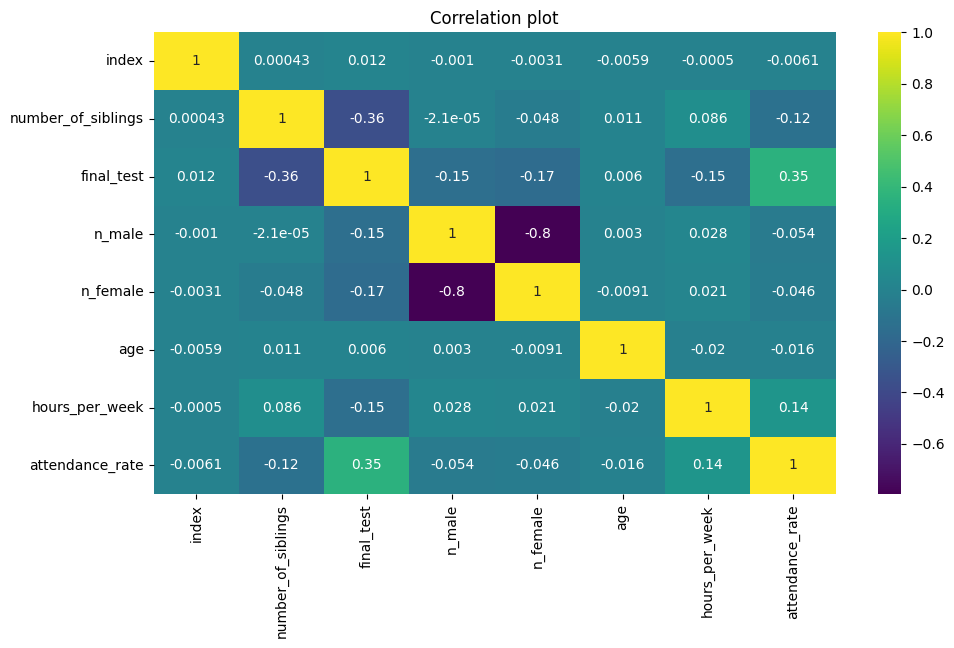

In [73]:
# create a correlation plot of all numeric variables
plt.figure(figsize=(11,6), dpi=100)
sns.heatmap(df2.select_dtypes(['int','float']).corr(), annot=True, cmap='viridis')
plt.title('Correlation plot')
plt.show()

In [75]:
# 'Attendance rate' in % from students shows the highest correlation to maths test score
df2.select_dtypes(['int','float']).corr()['final_test'].sort_values(ascending=False)

final_test            1.000000
attendance_rate       0.350038
index                 0.012407
age                   0.006029
hours_per_week       -0.148795
n_male               -0.149936
n_female             -0.169984
number_of_siblings   -0.364530
Name: final_test, dtype: float64

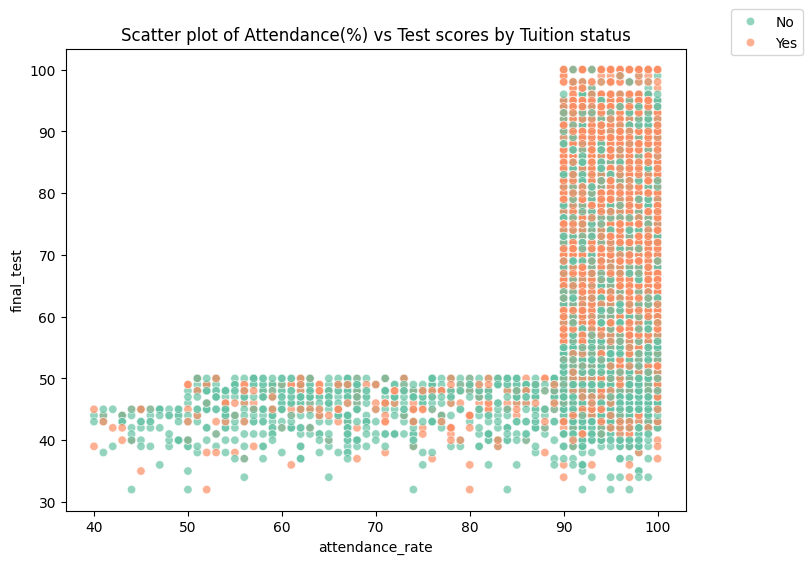

In [77]:
# scatter plot of attendance_rate, vs final test score encoding for tuition
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(data=df2, x='attendance_rate', y='final_test', hue='tuition', alpha=0.7, palette='Set2')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.title('Scatter plot of Attendance(%) vs Test scores by Tuition status')
plt.show()

In [79]:
# to remove all missing values before predictive modelling
df2 = df2.dropna()

In [81]:
df2.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,SPORTS,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,SPORTS,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
4,4,0,No,SPORTS,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
5,5,0,No,ARTS,Visual,BA6R14,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport,red
7,7,0,No,SPORTS,Visual,HTP8CW,Male,No,76.0,20.0,2.0,15.0,3.0,97.0,21:00,5:00,public transport,green


In [83]:
# to remove variables not useful for analysis
df2 = df2.drop(['index','student_id','sleep_time'], axis=1)

In [85]:
# to remove sleep_time from analysis because going to bed does to equate to falling asleep, to include 
# wake time in analysis, to see if students who are early riser do will do well in mathematics exams

In [87]:
df2.head()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,wake_time,mode_of_transport,bag_color
0,0,Yes,SPORTS,Visual,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,6:00,private transport,yellow
1,2,No,SPORTS,Auditory,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,6:30,private transport,green
4,0,No,SPORTS,Auditory,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,5:30,public transport,yellow
5,0,No,ARTS,Visual,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,6:30,private transport,red
7,0,No,SPORTS,Visual,Male,No,76.0,20.0,2.0,15.0,3.0,97.0,5:00,public transport,green


In [89]:
# to define X 
X = df2.drop('final_test', axis=1)

In [93]:
# to convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [95]:
X

,number_of_siblings,n_male,n_female,age,hours_per_week,attendance_rate,direct_admission_Yes,CCA_CLUBS,CCA_NONE,CCA_SPORTS,...,wake_time_6:00,wake_time_6:30,wake_time_7:00,mode_of_transport_public transport,mode_of_transport_walk,bag_color_blue,bag_color_green,bag_color_red,bag_color_white,bag_color_yellow
0,0,14.0,2.0,16.0,10.0,91.0,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,2,4.0,19.0,16.0,7.0,94.0,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
4,0,24.0,3.0,16.0,7.0,95.0,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
5,0,9.0,12.0,15.0,11.0,96.0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
7,0,20.0,2.0,15.0,3.0,97.0,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15890,0,19.0,8.0,15.0,9.0,97.0,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
15894,0,16.0,12.0,15.0,14.0,95.0,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
15895,1,12.0,14.0,16.0,9.0,96.0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
15897,1,7.0,10.0,15.0,7.0,93.0,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False


In [97]:
# to define y
y = df2['final_test']

In [99]:
from sklearn.model_selection import train_test_split 

In [101]:
# testing set = 20%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# to split into validation set(10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [105]:
from sklearn.preprocessing import StandardScaler

In [107]:
# to create an instance of a scaler
scaler = StandardScaler()

In [109]:
scaled_X_train = scaler.fit_transform(X_train)

In [111]:
scaled_X_val = scaler.fit_transform(X_val)

In [113]:
scaled_X_test = scaler.transform(X_test)

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [117]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [119]:
from xgboost import XGBRegressor

In [121]:
from sklearn.svm import SVR

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [125]:
from sklearn.linear_model import LinearRegression

In [129]:
# to import evaluation metrics for regression models
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [131]:
# to initialize the decision tree model
dt = DecisionTreeRegressor()

In [133]:
# to fit the decision tree modelinto the training data
dt.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [139]:
# to predict on the X validation set, Decision tree
y_val_pred_dt = dt.predict(scaled_X_val)

In [145]:
# to calculate Regression metrics for validation set
val_mae_dt = mean_absolute_error(y_val, y_val_pred_dt)
val_mse_dt = mean_squared_error(y_val, y_val_pred_dt)
val_rmse_dt = root_mean_squared_error(y_val, y_val_pred_dt) # RMSE is the square root of MSE
val_r2_dt = r2_score(y_val, y_val_pred_dt)

# Display the metrics
print("Decision Tree reg Validation metrics")
print(f"Validation MAE : {val_mae_dt}")
print(f"Validation MSE : {val_mse_dt}")
print(f"Validation RMSE : {val_rmse_dt}")
print(f"Validation R2 : {val_r2_dt}")

Decision Tree reg Validation metrics
Validation MAE : 6.865988909426987
Validation MSE : 97.0804066543438
Validation RMSE : 9.852938985619662
Validation R2 : 0.46839009557782785


In [240]:
# to predict on training set, Decision tree
y_train_pred_dt = dt.predict(scaled_X_train)

In [248]:
# to calculate Regression metrics for training set
train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
train_rmse_dt = root_mean_squared_error(y_train, y_train_pred_dt) # RMSE is the square root of MSE
train_r2_dt = r2_score(y_train, y_train_pred_dt)

# Display the metrics
print("Decision Tree reg Validation metrics")
print(f"Training MAE : {train_mae_dt}")
print(f"Training MSE : {train_mse_dt}")
print(f"Training RMSE : {train_rmse_dt}")
print(f"Training R2 : {train_r2_dt}")

Decision Tree reg Validation metrics
Training MAE : 0.0
Training MSE : 0.0
Training RMSE : 0.0
Training R2 : 1.0


In [153]:
# the training set for Decision tree regressor is overfitted, when the model is overfitted, it will not generalised well on
# the testing data, producing incorrect prediction

In [157]:
# to import regularization for overfitting prevention
from sklearn.linear_model import RidgeCV

In [159]:
# perform cross validation to determine which alpha value to use in Ridge regression
# alpha = 0.1, 1.0, 10.0 are default values in Ridge CV model
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0))

In [161]:
# to use the training set for the purpose of Hyper parameter tuning for Ridge regression model
ridge_cv_model.fit(scaled_X_train, y_train)

RidgeCV()

In [163]:
# to see which alpha value perform the best, alpha= 1.0 performs the best
ridge_cv_model.alpha_

1.0

In [165]:
# neg_mean_absolute_error, the higher the value the better, to re-run model with the scoring metric
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [167]:
ridge_cv_model.fit(scaled_X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [169]:
# to see which alpha value perform the best after using the scoring metric, alpha= 0.1 performs the best
ridge_cv_model.alpha_

0.1

In [171]:
ridge_cv_model.coef_[:10]

array([-4.53391073, -9.16616954, -9.39998345,  0.04540236, -0.67108405,
        2.84901627,  0.09672438, -0.13974889,  0.50047906, -0.02294841])

In [173]:
# to import LASSO CV for hyperparameter tuning to prevent overfitting
from sklearn.linear_model import LassoCV

In [175]:
# default values: eps= 0.01, n_alphas=100, to increase no. of max iterations
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [177]:
# to fit the Lasso Cross validation on training data
lasso_cv_model.fit(scaled_X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [179]:
# to check the best performing alpha value in Lasso Regression, best performing value = 0.04132
lasso_cv_model.alpha_

0.04132013573445264

In [181]:
lasso_cv_model.coef_[:10]

array([-4.47555362e+00, -8.93689867e+00, -9.18982062e+00,  3.85924421e-03,
       -6.32281621e-01,  2.83374404e+00,  1.23688861e-01, -8.92253147e-02,
        4.73906027e-01,  0.00000000e+00])

In [183]:
# to implement the ElasticNet cross validation for hyperparameters tuning to prevent overfitting
from sklearn.linear_model import ElasticNetCV

In [185]:
# Default values, eps=0.001, n_alphas=100
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], 
                                eps=0.001, n_alphas=100, max_iter=1000000)

In [187]:
# to train the Elastic Net CV on the training data
elastic_cv_model.fit(scaled_X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [258]:
elastic_cv_model.l1_ratio_

1.0

In [260]:
# the alpha values: 0.04132 is the same as Lasso_cv_model.alpha, the model completely disregards Ridge regression
elastic_cv_model.alpha_

0.04132013573445264

In [262]:
# to use ElasticNetCV to predict on X testing set
test_pred_dt = elastic_cv_model.predict(scaled_X_test)
test_pred_dt[:10]

array([69.72742736, 66.34974425, 57.76529602, 63.24920405, 80.19834489,
       45.5913859 , 78.04783632, 52.33458887, 74.52136818, 59.72834746])

In [266]:
# to calculate Regression metrics for testing set, Decision Tre
test_mae_dt = mean_absolute_error(y_test, test_pred_dt)
test_mse_dt = mean_squared_error(y_test, test_pred_dt)
test_rmse_dt = root_mean_squared_error(y_test, test_pred_dt)
test_r2_dt = r2_score(y_test, test_pred_dt)

# to display the metrics
print("Decision Tree Reg Testing metrics")
print(f"Testing MAE : {test_mae_dt}")
print(f"Testing MSE : {test_mse_dt}")
print(f"Testing RMSE : {test_rmse_dt}")
print(f"Testing R2 : {test_r2_dt}")

Decision Tree Reg Testing metrics
Testing MAE : 7.240184490658419
Testing MSE : 80.33218631997916
Testing RMSE : 8.96282245277564
Testing R2 : 0.5257787333501607


In [270]:
# to use ElasticNetCV to predict on X training set
train_pred_dt = elastic_cv_model.predict(scaled_X_train)
train_pred_dt[:10]

array([80.88864649, 64.99804868, 65.49107719, 43.74512162, 56.46324989,
       62.81086786, 73.23387639, 52.72619496, 83.40255557, 77.52155933])

In [272]:
# to calculate Regression metrics for training set, Decision Tree
train_mae_dt = mean_absolute_error(y_train, train_pred_dt)
train_mse_dt = mean_squared_error(y_train, train_pred_dt)
train_rmse_dt = root_mean_squared_error(y_train, train_pred_dt)
train_r2_dt = r2_score(y_train, train_pred_dt)

# to display the metrics
print("Decision Tree Reg Training metrics")
print(f"Training MAE : {train_mae_dt}")
print(f"Training MSE : {train_mse_dt}")
print(f"Training RMSE : {train_rmse_dt}")
print(f"Training R2 : {train_r2_dt}")

Decision Tree Reg Training metrics
Training MAE : 7.206230320965875
Training MSE : 81.0792867125045
Training RMSE : 9.004403739976595
Training R2 : 0.5213987534356226


In [274]:
# to create the random forest model
rf = RandomForestRegressor()

In [276]:
rf.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [278]:
# to predict on Random Forest training set, X train
y_train_pred_rf = rf.predict(scaled_X_train)
y_train_pred_rf[:10]

array([72.01, 72.18, 56.22, 47.8 , 53.93, 67.69, 67.07, 51.49, 72.6 ,
       77.75])

In [280]:
# to calculate Regression metrics for training set, Random Forest
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = root_mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# to display the metrics
print("Random Forest Training metrics")
print(f"Training MAE : {train_mae_rf}")
print(f"Training MSE : {train_mse_rf}")
print(f"Training RMSE : {train_rmse_rf}")
print(f"Training R2 : {train_r2_rf}")

Random Forest Training metrics
Training MAE : 1.9953051317614425
Training MSE : 7.507501849283403
Training RMSE : 2.739982089226753
Training R2 : 0.9556841224270753


In [282]:
# to predict on Random Forest testing set, X test
y_test_pred_rf = rf.predict(scaled_X_test)
y_test_pred_rf[:10]

array([67.67, 77.67, 46.6 , 61.59, 73.4 , 48.09, 77.36, 52.32, 73.84,
       64.56])

In [284]:
# to calculate Regression metrics for testing set
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = root_mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# to display the metrics
print("Random Forest testing set")
print(f"Testing MAE: {test_mae_rf}")
print(f"Testing MSE: {test_mse_rf}")
print(f"Testing RMSE: {test_rmse_rf}")
print(f"Testing R2: {test_r2_rf}")

Random Forest testing set
Testing MAE: 5.140415896487985
Testing MSE: 47.96498900184843
Testing RMSE: 6.925676068215177
Testing R2: 0.7168505068603481


In [286]:
# to create the AdaBoost model
ada = AdaBoostRegressor()

In [288]:
# to fit the model to training data
ada.fit(scaled_X_train, y_train)

AdaBoostRegressor()

In [302]:
# to predict on X training set
ada_train_pred = ada.predict(scaled_X_train)
ada_train_pred[:10] 

array([76.12628376, 60.88896504, 66.03363519, 51.8265242 , 57.16251246,
       61.30615066, 65.2124183 , 57.16251246, 71.26190476, 73.58786693])

In [304]:
# to calculate the Regression metrics for the Training set
train_mae_ada = mean_absolute_error(y_train, ada_train_pred)
train_mse_ada = mean_squared_error(y_train, ada_train_pred)
train_rmse_ada = root_mean_squared_error(y_train, ada_train_pred)
train_r2_ada = r2_score(y_train, ada_train_pred)

# to display the metrics
print("AdaBoost Training metrics")
print(f"Training MAE: {train_mae_ada}")
print(f"Training MSE: {train_mse_ada}")
print(f"Training RMSE: {train_rmse_ada}")
print(f"Training R2: {train_r2_ada}")

AdaBoost Training metrics
Training MAE: 7.409893347595434
Training MSE: 83.2919833083837
Training RMSE: 9.126444176588366
Training R2: 0.5083374724106475


In [306]:
# to predict on X training set
ada_test_pred = ada.predict(scaled_X_test)
ada_test_pred[:10] 

array([65.2124183 , 73.54162042, 56.77588997, 61.30615066, 76.12628376,
       52.49132256, 75.95328826, 53.71079982, 66.03363519, 59.99622642])

In [308]:
# to calculate the Regression metrics for the Testing set
test_mae_ada = mean_absolute_error(y_test, ada_test_pred)
test_mse_ada = mean_squared_error(y_test, ada_test_pred)
test_rmse_ada = root_mean_squared_error(y_test, ada_test_pred)
test_r2_ada = r2_score(y_test, ada_test_pred)

# to display the metrics
print("AdaBoost Testing metrics")
print(f"Testing MAE: {test_mae_ada}")
print(f"Testing MSE: {test_mse_ada}")
print(f"Testing RMSE: {test_rmse_ada}")
print(f"Testing R2: {test_r2_ada}")

AdaBoost Testing metrics
Testing MAE: 7.423497734612633
Testing MSE: 84.13699535702261
Testing RMSE: 9.172622054626617
Testing R2: 0.5033179807730985


In [310]:
# to create and instance of Gradient Boost regressor
gbr = GradientBoostingRegressor()

In [312]:
gbr.fit(scaled_X_train, y_train)

GradientBoostingRegressor()

In [316]:
# to predict on the X training data
gbr_train_pred = gbr.predict(scaled_X_train)
gbr_train_pred[:10]

array([81.81959447, 61.84830237, 60.9775904 , 42.54841998, 53.05519212,
       65.39971441, 67.27519703, 52.81704158, 72.15058762, 80.2412649 ])

In [318]:
# to calculate the Regression metrics for the Training set
train_mae_gbr = mean_absolute_error(y_train, gbr_train_pred)
train_mse_gbr = mean_squared_error(y_train, gbr_train_pred)
train_rmse_gbr = root_mean_squared_error(y_train, gbr_train_pred)
train_r2_gbr = r2_score(y_train, gbr_train_pred)

# to display the metrics
print("Gradient Boost Training metrics")
print(f"Training MAE: {train_mae_gbr}")
print(f"Training MSE: {train_mse_gbr}")
print(f"Training RMSE: {train_rmse_gbr}")
print(f"Training R2: {train_r2_gbr}")

Gradient Boost Training metrics
Training MAE: 5.928756367559057
Training MSE: 59.42967025491362
Training RMSE: 7.709064162070103
Training R2: 0.649193827176024


In [320]:
# to predict on the X testing data
gbr_test_pred = gbr.predict(scaled_X_test)
gbr_test_pred[:10]

array([66.46317522, 74.50884746, 48.71624785, 62.07491586, 80.48484299,
       46.96453326, 79.97325219, 50.88721536, 74.98239605, 60.52412676])

In [322]:
# to calculate the Regression metrics for the Testing set
test_mae_gbr = mean_absolute_error(y_test, gbr_test_pred)
test_mse_gbr = mean_squared_error(y_test, gbr_test_pred)
test_rmse_gbr = root_mean_squared_error(y_test, gbr_test_pred)
test_r2_gbr = r2_score(y_test, gbr_test_pred)

# to display the metrics
print("Gradient Boost Testing metrics")
print(f"Testing MAE: {test_mae_gbr}")
print(f"Testing MSE: {test_mse_gbr}")
print(f"Testing RMSE: {test_rmse_gbr}")
print(f"Testing R2: {test_r2_gbr}")

Gradient Boost Testing metrics
Testing MAE: 5.8518160952657405
Testing MSE: 57.95422941813306
Testing RMSE: 7.612767526867811
Testing R2: 0.6578814875906447


In [324]:
# to create the XGBoost model
xgb = XGBRegressor()

In [326]:
xgb.fit(scaled_X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [328]:
# to predict on the X training data
xgb_train_pred = xgb.predict(scaled_X_train)
xgb_train_pred[:10]

array([74.948074, 68.74674 , 58.548126, 46.46301 , 52.791035, 66.47336 ,
       67.3186  , 51.67465 , 73.0583  , 78.715675], dtype=float32)

In [330]:
# to calculate the Regression metrics for the Training set
train_mae_xgb = mean_absolute_error(y_train, xgb_train_pred)
train_mse_xgb = mean_squared_error(y_train, xgb_train_pred)
train_rmse_xgb = root_mean_squared_error(y_train, xgb_train_pred)
train_r2_xgb = r2_score(y_train, xgb_train_pred)

# to display the metrics
print("XGBoost Training metrics")
print(f"Training MAE: {train_mae_xgb}")
print(f"Training MSE: {train_mse_xgb}")
print(f"Training RMSE: {train_rmse_xgb}")
print(f"Training R2: {train_r2_xgb}")

XGBoost Training metrics
Training MAE: 3.535920522745373
Training MSE: 23.347511778706394
Training RMSE: 4.831926301042515
Training R2: 0.8621824550444396


In [332]:
# to predict on the X testing data
xgb_test_pred = xgb.predict(scaled_X_test)
xgb_test_pred[:10]

array([65.670456, 75.04613 , 64.2779  , 75.88193 , 79.39578 , 61.041924,
       77.87217 , 65.901306, 74.533905, 53.232014], dtype=float32)

In [334]:
# to calculate the Regression metrics for the Training set
test_mae_xgb = mean_absolute_error(y_test, xgb_test_pred)
test_mse_xgb = mean_squared_error(y_test, xgb_test_pred)
test_rmse_xgb = root_mean_squared_error(y_test, xgb_test_pred)
test_r2_xgb = r2_score(y_test, xgb_test_pred)

# to display the metrics
print("XGBoost Testing metrics")
print(f"Testing MAE: {test_mae_xgb}")
print(f"Testing MSE: {test_mse_xgb}")
print(f"Testing RMSE: {test_rmse_xgb}")
print(f"Testing R2: {test_r2_xgb}")

XGBoost Testing metrics
Testing MAE: 8.870307361793165
Testing MSE: 128.9276015193191
Testing RMSE: 11.354629078896373
Testing R2: 0.23890767450192918


In [336]:
# support vector machine regressor
svr = SVR()

In [338]:
svr.fit(scaled_X_train, y_train)

SVR()

In [340]:
# to predict on X training data
svr_train_pred = svr.predict(scaled_X_train)
svr_train_pred[:10]

array([74.71024579, 65.32636523, 67.76358845, 40.97871366, 56.02344254,
       63.94785481, 69.42927774, 57.04557479, 72.15488888, 76.86284253])

In [342]:
# to calculate the Regression metrics for the Training set
train_mae_svr = mean_absolute_error(y_train, svr_train_pred)
train_mse_svr = mean_squared_error(y_train, svr_train_pred)
train_rmse_svr = root_mean_squared_error(y_train, svr_train_pred)
train_r2_svr = r2_score(y_train, svr_train_pred)

# to display the metrics
print("Support Vector Machine Training metrics")
print(f"Training MAE: {train_mae_svr}")
print(f"Training MSE: {train_mse_svr}")
print(f"Training RMSE: {train_rmse_svr}")
print(f"Training R2: {train_r2_svr}")

Support Vector Machine Training metrics
Training MAE: 6.66132840132927
Training MSE: 74.33759951297426
Training RMSE: 8.621925510753051
Training R2: 0.5611941195330485


In [344]:
# to predict on X testing data
svr_test_pred = svr.predict(scaled_X_test)
svr_test_pred[:10]

array([68.3754234 , 65.62965654, 57.91541643, 64.99506266, 76.05736798,
       46.96953063, 78.25731949, 52.75774665, 73.38393608, 61.24811287])

In [346]:
# to calculate the Regression metrics for the Testing set
test_mae_svr = mean_absolute_error(y_test, svr_test_pred)
test_mse_svr = mean_squared_error(y_test, svr_test_pred)
test_rmse_svr = root_mean_squared_error(y_test, svr_test_pred)
test_r2_svr = r2_score(y_test, svr_test_pred)

# to display the metrics
print("Support Vector Machine Testing metrics")
print(f"Testing MAE: {test_mae_svr}")
print(f"Testing MSE: {test_mse_svr}")
print(f"Testing RMSE: {test_rmse_svr}")
print(f"Testing R2: {test_r2_svr}")

Support Vector Machine Testing metrics
Testing MAE: 6.964385586649353
Testing MSE: 78.61613740760562
Testing RMSE: 8.866574164106767
Testing R2: 0.5359090052391564


In [348]:
# to initialise an instance of KNN classifier
knn = KNeighborsRegressor()

In [350]:
knn.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [352]:
# to predict on the X training data
knn_train_pred = knn.predict(scaled_X_train)
knn_train_pred[:10]

array([70.8, 63.2, 68.4, 53.2, 55.4, 54.4, 62.2, 61. , 72. , 68.8])

In [354]:
# to calculate the Regression metrics for the Training set
train_mae_knn = mean_absolute_error(y_train, knn_train_pred)
train_mse_knn = mean_squared_error(y_train, knn_train_pred)
train_rmse_knn = root_mean_squared_error(y_train, knn_train_pred)
train_r2_knn = r2_score(y_train, knn_train_pred)

# to display the metrics
print("KNN Regressor Training metrics")
print(f"Training MAE: {train_mae_knn}")
print(f"Training MSE: {train_mse_knn}")
print(f"Training RMSE: {train_rmse_knn}")
print(f"Training R2: {train_r2_knn}")

KNN Regressor Training metrics
Training MAE: 6.660864539990754
Training MSE: 74.0542071197411
Training RMSE: 8.605475415091318
Training R2: 0.5628669506366223


In [356]:
# to predict on the X testing data
knn_test_pred = knn.predict(scaled_X_test)
knn_test_pred[:10]

array([70.2, 75.6, 61. , 72.4, 74. , 45.6, 76.6, 50.4, 74. , 57.4])

In [360]:
# to calculate the Regression metrics for the Testing set
test_mae_knn = mean_absolute_error(y_test, knn_test_pred)
test_mse_knn = mean_squared_error(y_test, knn_test_pred)
test_rmse_knn = root_mean_squared_error(y_test, knn_test_pred)
test_r2_knn = r2_score(y_test, knn_test_pred)

# to display the metrics
print("KNN Regressor Testing metrics")
print(f"Testing MAE: {test_mae_knn}")
print(f"Testing MSE: {test_mse_knn}")
print(f"Testing RMSE: {test_rmse_knn}")
print(f"Testing R2: {test_r2_knn}")

KNN Regressor Testing metrics
Testing MAE: 8.29260628465804
Testing MSE: 114.161146025878
Testing RMSE: 10.68462194117686
Testing R2: 0.3260778057882294


In [362]:
# to initialise the Logistic Regression model
lr = LinearRegression()

In [364]:
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [366]:
# to predict on the X train data
lr_train_pred = knn.predict(scaled_X_train)
lr_train_pred[:10]

array([70.8, 63.2, 68.4, 53.2, 55.4, 54.4, 62.2, 61. , 72. , 68.8])

In [368]:
# to calculate the Regression metrics for the Training set
train_mae_lr = mean_absolute_error(y_train, lr_train_pred)
train_mse_lr = mean_squared_error(y_train, lr_train_pred)
train_rmse_lr = root_mean_squared_error(y_train, lr_train_pred)
train_r2_lr = r2_score(y_train, lr_train_pred)

# to display the metrics
print("Logistic Regression Training metrics")
print(f"Training MAE: {train_mae_lr}")
print(f"Training MSE: {train_mse_lr}")
print(f"Training RMSE: {train_rmse_lr}")
print(f"Training R2: {train_r2_lr}")

Logistic Regression Training metrics
Training MAE: 6.660864539990754
Training MSE: 74.0542071197411
Training RMSE: 8.605475415091318
Training R2: 0.5628669506366223


In [370]:
# to predict on the X testing data
lr_test_pred = knn.predict(scaled_X_test)
lr_test_pred[:10]

array([70.2, 75.6, 61. , 72.4, 74. , 45.6, 76.6, 50.4, 74. , 57.4])

In [372]:
# to calculate the Regression metrics for the Testing set
test_mae_lr = mean_absolute_error(y_test, lr_test_pred)
test_mse_lr = mean_squared_error(y_test, lr_test_pred)
test_rmse_lr = root_mean_squared_error(y_test, lr_test_pred)
test_r2_lr = r2_score(y_test, lr_test_pred)

# to display the metrics
print("Logistic Regression Testing metrics")
print(f"Testing MAE: {test_mae_lr}")
print(f"Testing MSE: {test_mse_lr}")
print(f"Testing RMSE: {test_rmse_lr }")
print(f"Testing R2: {test_r2_lr}")

Logistic Regression Testing metrics
Testing MAE: 8.29260628465804
Testing MSE: 114.161146025878
Testing RMSE: 10.68462194117686
Testing R2: 0.3260778057882294


In [374]:
# The Random Forest Regressor model has the smallest Root mean square error = 6.9256

In [392]:
rf.feature_importances_

array([0.24075258, 0.09577134, 0.08889258, 0.00990299, 0.14542828,
       0.15823543, 0.06296886, 0.00958356, 0.00175536, 0.00833654,
       0.04615603, 0.00911888, 0.0519311 , 0.0066182 , 0.00755514,
       0.00695204, 0.00426807, 0.00691936, 0.00428447, 0.00727003,
       0.00673367, 0.00675387, 0.00687163, 0.00693998])

In [394]:
pd.DataFrame(data= rf.feature_importances_ , index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
number_of_siblings,0.240753
attendance_rate,0.158235
hours_per_week,0.145428
n_male,0.095771
n_female,0.088893
direct_admission_Yes,0.062969
tuition_Yes,0.051931
learning_style_Visual,0.046156
age,0.009903
CCA_CLUBS,0.009584


In [396]:
# to read into a new dataframe
rf_imp = pd.DataFrame(data= rf.feature_importances_ , index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [398]:
# to filter out features less than 0. 007
rf_imp = rf_imp[rf_imp['Importance'] > 0.007]

In [400]:
rf_imp

,Importance
number_of_siblings,0.240753
attendance_rate,0.158235
hours_per_week,0.145428
n_male,0.095771
n_female,0.088893
direct_admission_Yes,0.062969
tuition_Yes,0.051931
learning_style_Visual,0.046156
age,0.009903
CCA_CLUBS,0.009584


C:\Users\miche\AppData\Local\Temp\ipykernel_15388\3998533512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_imp, y=rf_imp.index, x='Importance', palette='flare')


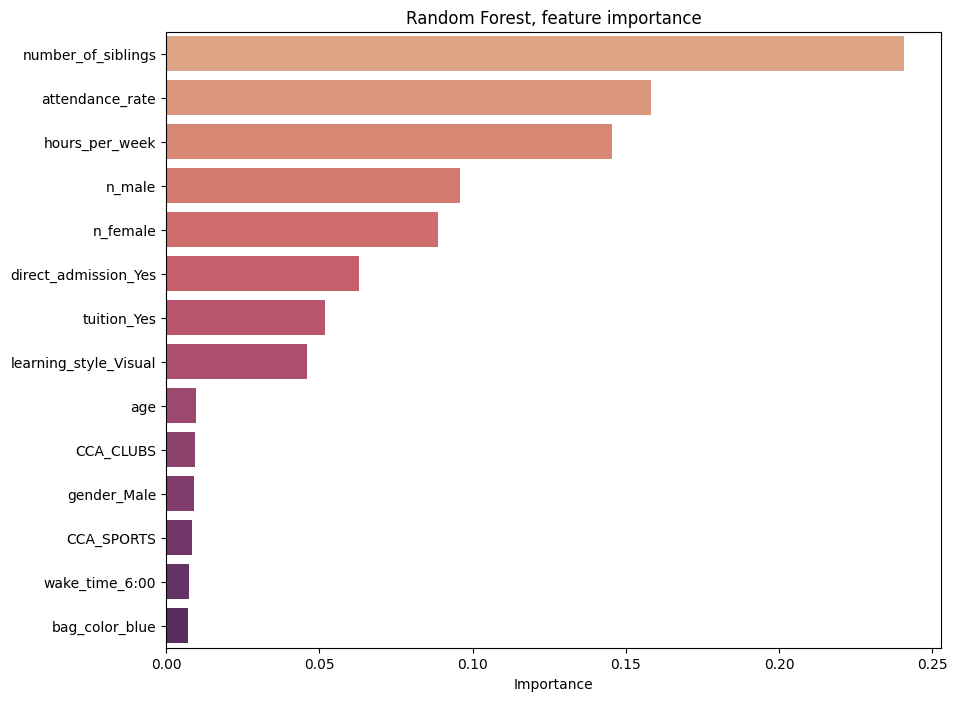

In [404]:
# to visualise in a barplot
plt.figure(figsize=(10,8), dpi=100)
sns.barplot(data=rf_imp, y=rf_imp.index, x='Importance', palette='flare')
plt.title('Random Forest, feature importance')
plt.ylabel('')
plt.show()

In [ ]:
# Predictors on how students will score on their o levels Maths test
1) number of siblings, 2) attendance rate(%) to class, 3) hours per week (time spent studying), 4) n_male: no.of male classmates